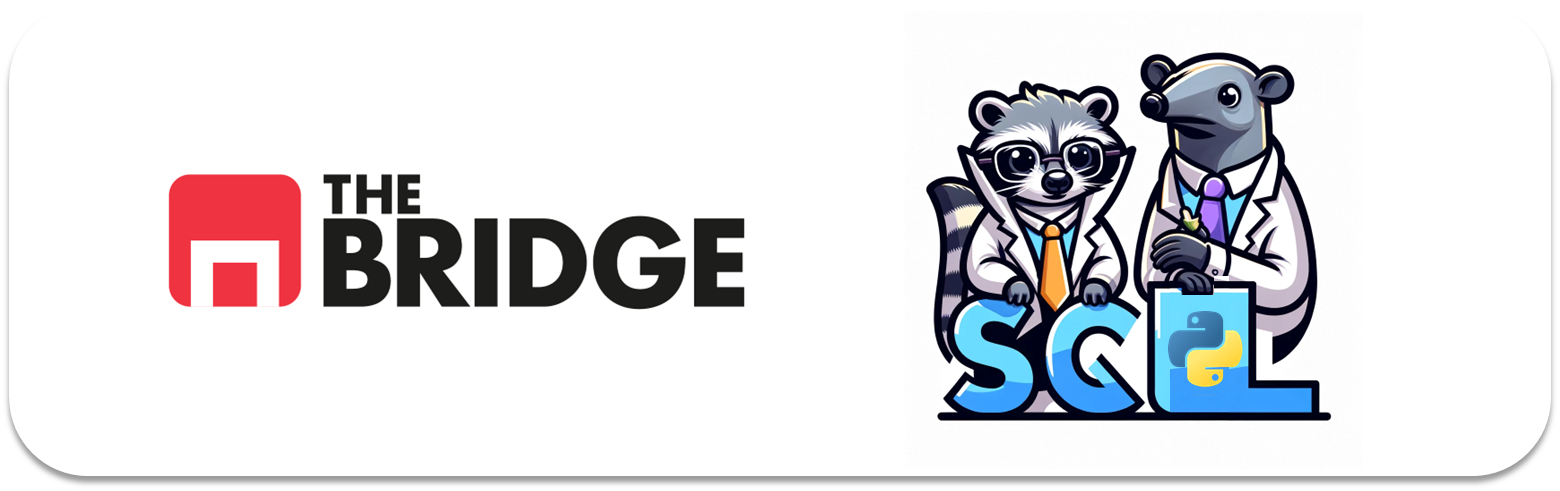

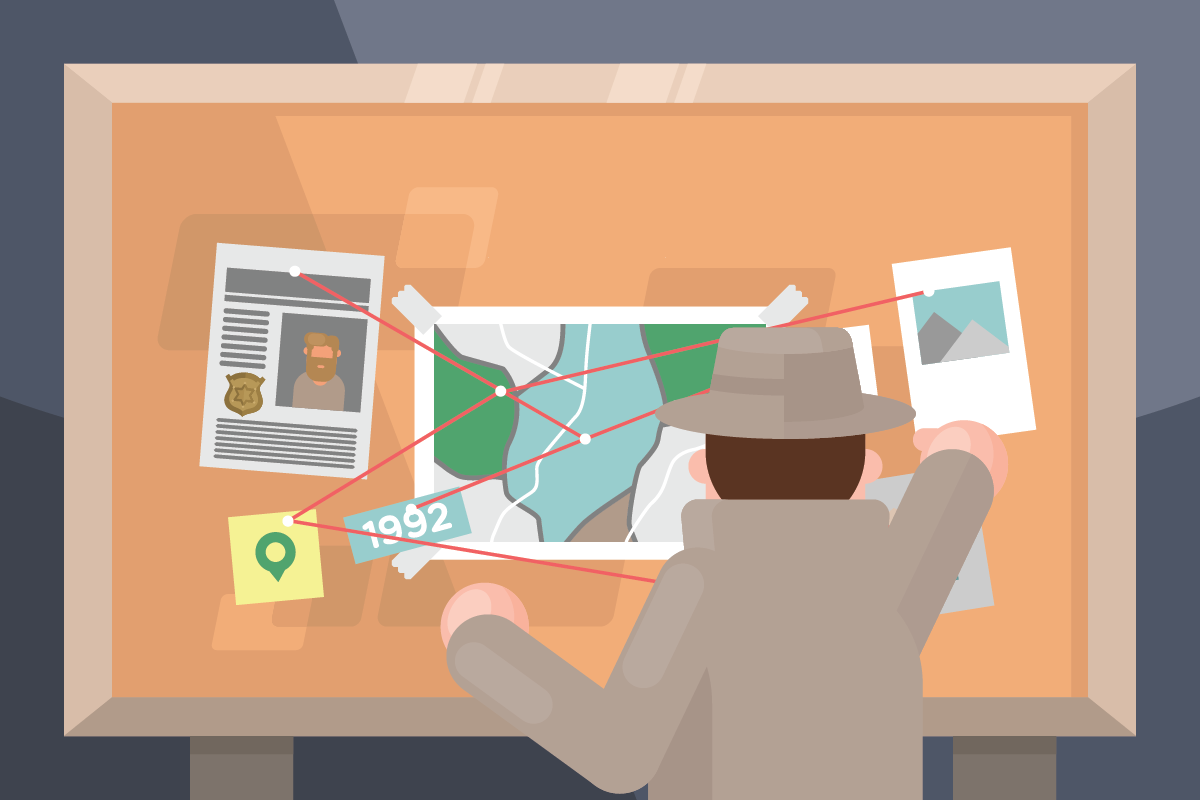


# Práctica Grupal: SQL Murder
Para este ejercicio os vais a ponerte la gabardina y el sombrero ya que tendréis que investigar un asesinato en *SQL City*. 

Aplicaréis los conecptos básicos de SQL y tendréis que manejaros con un modelo de datos, mientras resuelves un caso de asesinato :)

Este espectacular juego está creado por **Joon Park y Cathy He**, y podrás encontrar todos los detalles en [su web](http://mystery.knightlab.com)

Por un lado tendréis que resolver el caso a través de la propia web, donde encontrarás un intérprete de sentencias SQL interactivo. Tendréis que apuntar las queries y su resultado y cuando tengáis el caso resuelto, tendréis que armar un notebook en el que atacando a la base de datos que tenéis en el directorio data, resolváis el crimen con las mismas queries de la página web. 

Subiréis el notebook al repositorio del grupo y haréis una pequeña presentación del resultado y vuestras pesquisas de no más de 10 minutos. Al finalizar el sprint 7.


### Enunciado
A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a **murder** that occurred sometime on **Jan.15, 2018** and that it took place in **SQL City**. Start by retrieving the corresponding crime scene report from the police department’s database.


### Modelo de datos
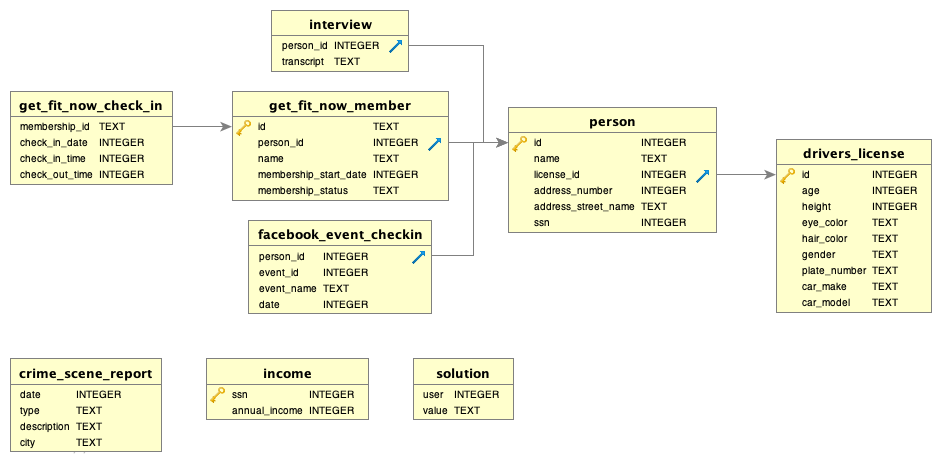


¡Suerte Irregulares!

In [1]:
import pandas as pd
import sqlite3

In [ ]:
def sql_query(query):
    cursor.execute(query)
    if query.lower().strip().startswith("select "):
        ans = cursor.fetchall()
        names = [description[0] for description in cursor.description]
        return pd.DataFrame(ans,columns=names)
    return None

In [6]:
connection= sqlite3.connect("./Data/sql-murder-mystery.db")
cursor=connection.cursor()
df=pd.read_sql("select* from crime_scene_report", connection)
df

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,be NO mistake about it: it was neither more no...,Trenton


In [12]:
query="""
SELECT *
FROM crime_scene_report
WHERE city is "SQL City" and date=20180115 and type="murder"
"""

In [13]:
df_filtrado=pd.read_sql(query, connection)
df_filtrado

,date,type,description,city
0,20180115,murder,Security footage shows that there were 2 witne...,SQL City


In [ ]:
# Descripcion del caso
descripcion="Security footage shows that there were 2 witnesses. The first witness lives at the last house on 'Northwestern Dr'. The second witness, named Annabel, lives somewhere on 'Franklin Ave'"

In [18]:
#primer testigo
query="""
SELECT *
FROM person
WHERE address_street_name="Northwestern Dr"
ORDER BY address_number desc
"""

In [27]:
df_testigo1=pd.read_sql(query, connection)
testigo1=df_testigo1.loc[0]
testigo1


id                               14887
name                    Morty Schapiro
license_id                      118009
address_number                    4919
address_street_name    Northwestern Dr
ssn                          111564949
Name: 0, dtype: object

In [41]:
#segundo testigo
query="""
SELECT *
FROM person
WHERE address_street_name="Franklin Ave" and name LIKE "Annabel%"

"""

In [42]:
df_testigo2=pd.read_sql(query,connection)
df_testigo2

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


In [45]:
query="""
SELECT *
FROM interview
WHERE person_id=16371 or person_id=14887
"""

In [46]:
df_testimonios=pd.read_sql(query, connection)
df_testimonios

,person_id,transcript
0,14887,I heard a gunshot and then saw a man run out. ...
1,16371,"I saw the murder happen, and I recognized the ..."


In [ ]:
# Testimonios
""" 
14887 - I heard a gunshot and then saw a man run out. He had a "Get Fit Now Gym" bag.
The membership number on the bag started with "48Z". Only gold members have those bags.
The man got into a car with a plate that included "H42W" 
   
16371 - I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th"""

In [51]:
query="""
SELECT *
FROM get_fit_now_member
WHERE membership_status="gold" and id LIKE "48Z%"
"""

In [52]:
df_miembro=pd.read_sql(query, connection)
df_miembro

,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold
1,48Z55,67318,Jeremy Bowers,20160101,gold


In [61]:
query="""
SELECT A.*, B.*
FROM get_fit_now_member as A
JOIN get_fit_now_check_in as B
ON A.id = B.membership_id
WHERE A.membership_status="gold" and A.id LIKE "48Z%" and B.check_in_date=20180109
"""

In [62]:
df_sospechosos=pd.read_sql(query,connection)
df_sospechosos

,id,person_id,name,membership_start_date,membership_status,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,28819,Joe Germuska,20160305,gold,48Z7A,20180109,1600,1730
1,48Z55,67318,Jeremy Bowers,20160101,gold,48Z55,20180109,1530,1700


In [76]:
query="""
SELECT A.*, B.*, C.*
FROM get_fit_now_member as A
JOIN get_fit_now_check_in as B
JOIN drivers_license as C
ON A.id = B.membership_id=C.id
WHERE A.membership_status="gold" and A.id LIKE "48Z%" and B.check_in_date=20180109 or C.plate_number LIKE "%H42W%"
"""

# Nos hemos quedado buscando el numero de la matricula

In [ ]:
SELECT A., B., C.*
FROM get_fit_now_member as A
JOIN get_fit_now_check_in as B ON A.id = B.membership_id
LEFT JOIN drivers_license as C ON A.id = C.id
WHERE A.membership_status = "gold" 
AND A.id LIKE "48Z%" 
AND B.check_in_date = 20180109 
AND C.plate_number LIKE "%H42W%";

In [77]:
df_sos_matricula=pd.read_sql(query, connection)
df_sos_matricula

,id,person_id,name,membership_start_date,membership_status,membership_id,check_in_date,check_in_time,check_out_time,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
